## 1.Kiểm tra giá trị null
Kiểm tra số giá trị null của từng cột dữ liệu

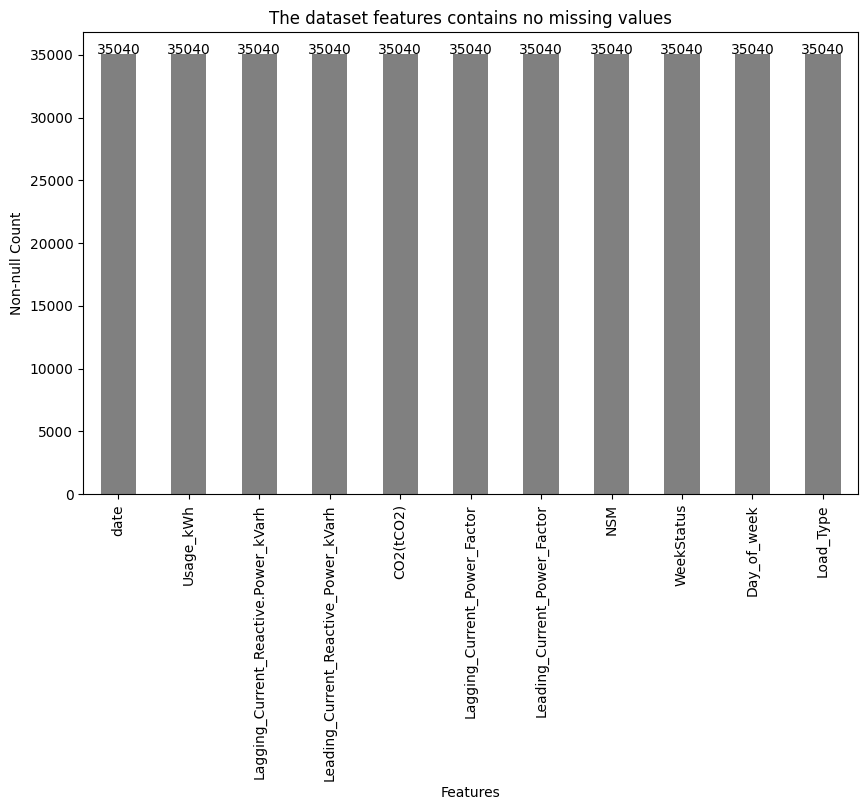

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv("Steel_industry_data.csv")

# Kiểm tra số lượng giá trị không phải null trong mỗi cột
null_counts = df.notnull().sum()

# Vẽ biểu đồ để kiểm tra giá trị thiếu
plt.figure(figsize=(10, 6))
bars = null_counts.plot(kind="bar", color="gray")
plt.title("The dataset features contains no missing values")
plt.xlabel("Features")
plt.ylabel("Non-null Count")

# Thêm số lượng trên đầu mỗi cột
for index, value in enumerate(null_counts):
    plt.text(index, value + 5, str(value), ha='center')

plt.show()


### 2.Kiểm tra phân bố chuẩn của các cột dữ liệu

Phân phối chuẩn (hay còn gọi là phân phối Gauss) là một trong những phân phối xác suất phổ biến nhất trong thống kê và khoa học dữ liệu. Nó có dạng hình chuông đối xứng, đặc trưng bởi hai tham số là trung bình (\( \mu \)) và độ lệch chuẩn (\( \sigma \)). Phân phối chuẩn thường được sử dụng để mô tả nhiều hiện tượng tự nhiên và đo lường ngẫu nhiên.

Đường cong phân phối chuẩn đạt cực đại tại giá trị trung bình, và độ rộng của đường cong phụ thuộc vào độ lệch chuẩn. Giá trị lớn hơn của \( \sigma \) làm cho đường cong trải rộng hơn.


Trong đoạn mã này, chúng ta tính toán phân phối chuẩn của ba đặc trưng trong tập dữ liệu: Usage_kWh, Lagging_Current_Power_Factor, và NSM. Mỗi đặc trưng được biểu diễn bằng một biểu đồ phân phối chuẩn dựa trên các giá trị trung bình và độ lệch chuẩn của chúng.

Công thức mật độ xác suất của phân phối chuẩn được sử dụng trong đoạn mã là:
Công thức mật độ xác suất của phân phối chuẩn:

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

Trong đó:
- \( x \): Giá trị của biến ngẫu nhiên
- \( \mu \): Trung bình của biến
- \( \sigma \): Độ lệch chuẩn của biến

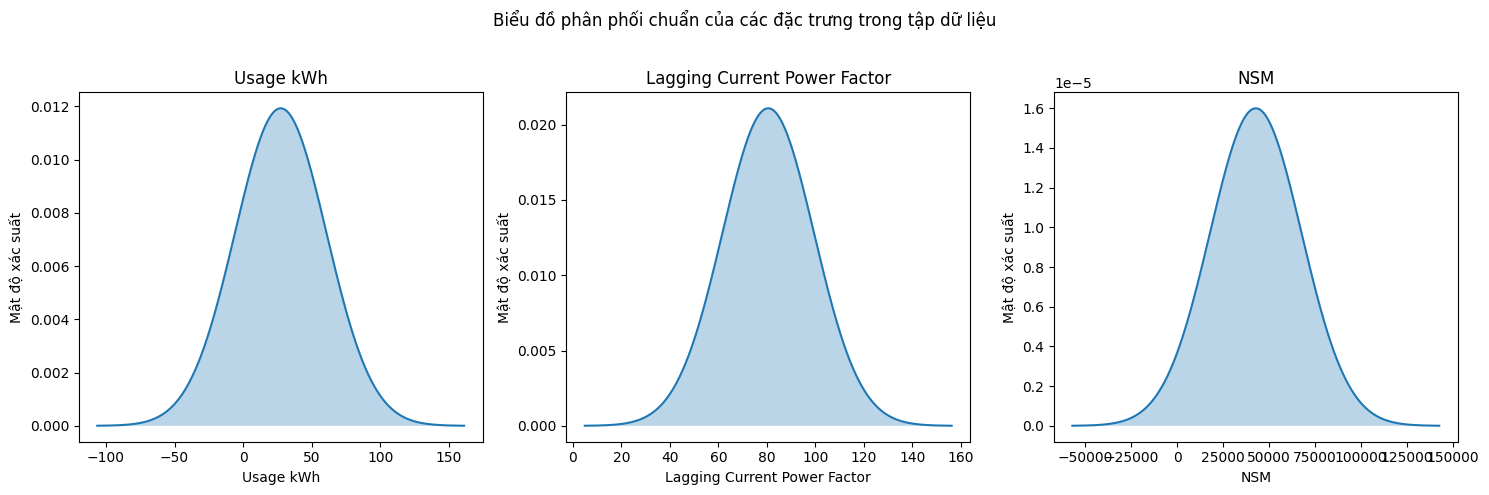

In [2]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv("Steel_industry_data.csv")

# Lấy dữ liệu cho ba cột
data_usage = df["Usage_kWh"].dropna()                    # Cột Usage_kWh
data_power_factor = df["Lagging_Current_Power_Factor"].dropna()  # Cột Lagging_Current_Power_Factor
data_nsm = df["NSM"].dropna()                             # Cột NSM

# Tính trung bình và độ lệch chuẩn cho từng cột
mu_usage, sigma_usage = np.mean(data_usage), np.std(data_usage)
mu_power_factor, sigma_power_factor = np.mean(data_power_factor), np.std(data_power_factor)
mu_nsm, sigma_nsm = np.mean(data_nsm), np.std(data_nsm)

# Tạo các giá trị x cho từng cột
x_usage = np.linspace(mu_usage - 4 * sigma_usage, mu_usage + 4 * sigma_usage, 1000)
x_power_factor = np.linspace(mu_power_factor - 4 * sigma_power_factor, mu_power_factor + 4 * sigma_power_factor, 1000)
x_nsm = np.linspace(mu_nsm - 4 * sigma_nsm, mu_nsm + 4 * sigma_nsm, 1000)

# Tính mật độ xác suất cho mỗi cột
pdf_usage = norm.pdf(x_usage, mu_usage, sigma_usage)
pdf_power_factor = norm.pdf(x_power_factor, mu_power_factor, sigma_power_factor)
pdf_nsm = norm.pdf(x_nsm, mu_nsm, sigma_nsm)

# Tạo figure và các subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Biểu đồ Usage_kWh
axes[0].plot(x_usage, pdf_usage, label='Usage kWh')
axes[0].fill_between(x_usage, pdf_usage, alpha=0.3)
axes[0].set_title("Usage kWh")
axes[0].set_xlabel("Usage kWh")
axes[0].set_ylabel("Mật độ xác suất")

# Biểu đồ Lagging_Current_Power_Factor
axes[1].plot(x_power_factor, pdf_power_factor, label='Lagging Current Power Factor')
axes[1].fill_between(x_power_factor, pdf_power_factor, alpha=0.3)
axes[1].set_title("Lagging Current Power Factor")
axes[1].set_xlabel("Lagging Current Power Factor")
axes[1].set_ylabel("Mật độ xác suất")

# Biểu đồ NSM
axes[2].plot(x_nsm, pdf_nsm, label='NSM')
axes[2].fill_between(x_nsm, pdf_nsm, alpha=0.3)
axes[2].set_title("NSM")
axes[2].set_xlabel("NSM")
axes[2].set_ylabel("Mật độ xác suất")

# Hiển thị tất cả các biểu đồ cùng một lúc
fig.suptitle("Biểu đồ phân phối chuẩn của các đặc trưng trong tập dữ liệu")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Điều chỉnh layout để không chồng lấn tiêu đề
plt.show()

### 3.Phân tích tương quan

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical(df, nominal_columns, ordinal_columns):
    df_encoded = df.copy()

    # Mã hóa cột Load_Type (Ordinal) thành 3 cột nhị phân
    if 'Load_Type' in ordinal_columns:
        onehot = OneHotEncoder(sparse_output=False, drop=None)
        encoded_cols = onehot.fit_transform(df_encoded[['Load_Type']])
        encoded_col_names = [f"Load_Type_{category}" for category in onehot.categories_[0]]
        encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=df_encoded.index)
        df_encoded = pd.concat([df_encoded.drop(columns=['Load_Type']), encoded_df], axis=1)

    # Mã hóa các cột nominal (dùng get_dummies)
    df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, drop_first=True)

    # Chuyển tất cả cột True/False sang 0/1
    for col in df_encoded.select_dtypes(include=['bool']).columns:
        df_encoded[col] = df_encoded[col].astype(int)

    return df_encoded


# Định nghĩa các cột nominal và ordinal
nominal_columns = ['WeekStatus', 'Day_of_week']
ordinal_columns = ['Load_Type']

# Mã hóa dữ liệu
df_encoded = encode_categorical(df, nominal_columns, ordinal_columns)

# Kiểm tra lại dữ liệu đã chuyển đổi
print(df_encoded.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [7]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import numpy as np

# Chọn các cột dựa trên kiểu dữ liệu
continuous_vars = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                   'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

binary_vars = ['WeekStatus']
categorical_vars = ['Day_of_week', 'Load_Type']

# 1. Tương quan Spearman cho các biến liên tục
spearman_corr = df[continuous_vars].corr(method='spearman')

# Hiển thị bảng với gradient màu để dễ dàng quan sát
print("### Tương quan Spearman (Biến liên tục)")
display(spearman_corr.style.background_gradient(cmap='coolwarm'))

# 2. Tương quan Spearman cho các cặp biến nhị phân - liên tục
binary_continuous_results = []
for binary_col in binary_vars:
    for continuous_col in continuous_vars:
        correlation, _ = spearmanr(df[binary_col], df[continuous_col])  
        binary_continuous_results.append([binary_col, continuous_col, correlation])

# Chuyển đổi thành DataFrame để hiển thị
binary_continuous_df = pd.DataFrame(binary_continuous_results, columns=['Biến nhị phân', 'Biến liên tục', 'Tương quan Spearman'])

# Hiển thị bảng kết quả biến nhị phân - liên tục với màu
print("\n### Tương quan Spearman (Cặp biến nhị phân - liên tục)")
display(binary_continuous_df.style.background_gradient(cmap='coolwarm', subset=['Tương quan Spearman']))


# 4. Kendall's Tau cho các cặp biến liên tục - phân loại
continuous_categorical_results = []
for cat_col in categorical_vars:
    for continuous_col in continuous_vars:
        tau, _ = kendalltau(df[cat_col], df[continuous_col]) 
        continuous_categorical_results.append([cat_col, continuous_col, tau])

# Chuyển đổi thành DataFrame để hiển thị
continuous_categorical_df = pd.DataFrame(continuous_categorical_results, columns=['Biến phân loại', 'Biến liên tục', 'Tương quan Spearman'])

# Hiển thị bảng kết quả biến liên tục - phân loại với màu
print("\n### Kendall’s Tau (Cặp biến liên tục - phân loại)")
display(continuous_categorical_df.style.background_gradient(cmap='coolwarm', subset=['Tương quan Spearman']))

### Tương quan Spearman (Biến liên tục)


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor
Usage_kWh,1.000000,0.644937,-0.131703,0.881514,0.375158,0.193501
Lagging_Current_Reactive.Power_kVarh,0.644937,1.000000,-0.720403,0.774188,-0.349535,0.744250
Leading_Current_Reactive_Power_kVarh,-0.131703,-0.720403,1.000000,-0.291267,0.755688,-0.967206
CO2(tCO2),0.881514,0.774188,-0.291267,1.000000,0.239258,0.334802
Lagging_Current_Power_Factor,0.375158,-0.349535,0.755688,0.239258,1.000000,-0.735175
Leading_Current_Power_Factor,0.193501,0.744250,-0.967206,0.334802,-0.735175,1.000000



### Tương quan Spearman (Cặp biến nhị phân - liên tục)


,Biến nhị phân,Biến liên tục,Tương quan Spearman
0,WeekStatus,Usage_kWh,-0.313772
1,WeekStatus,Lagging_Current_Reactive.Power_kVarh,-0.376717
2,WeekStatus,Leading_Current_Reactive_Power_kVarh,0.277706
3,WeekStatus,CO2(tCO2),-0.294912
4,WeekStatus,Lagging_Current_Power_Factor,0.141790
5,WeekStatus,Leading_Current_Power_Factor,-0.308554



### Kendall’s Tau (Cặp biến liên tục - phân loại)


,Biến phân loại,Biến liên tục,Tương quan Spearman
0,Day_of_week,Usage_kWh,0.023589
1,Day_of_week,Lagging_Current_Reactive.Power_kVarh,0.029261
2,Day_of_week,Leading_Current_Reactive_Power_kVarh,-0.020040
3,Day_of_week,CO2(tCO2),0.023800
4,Day_of_week,Lagging_Current_Power_Factor,-0.005033
5,Day_of_week,Leading_Current_Power_Factor,0.021608
6,Load_Type,Usage_kWh,0.447016
7,Load_Type,Lagging_Current_Reactive.Power_kVarh,0.154132
8,Load_Type,Leading_Current_Reactive_Power_kVarh,0.210400
9,Load_Type,CO2(tCO2),0.456960


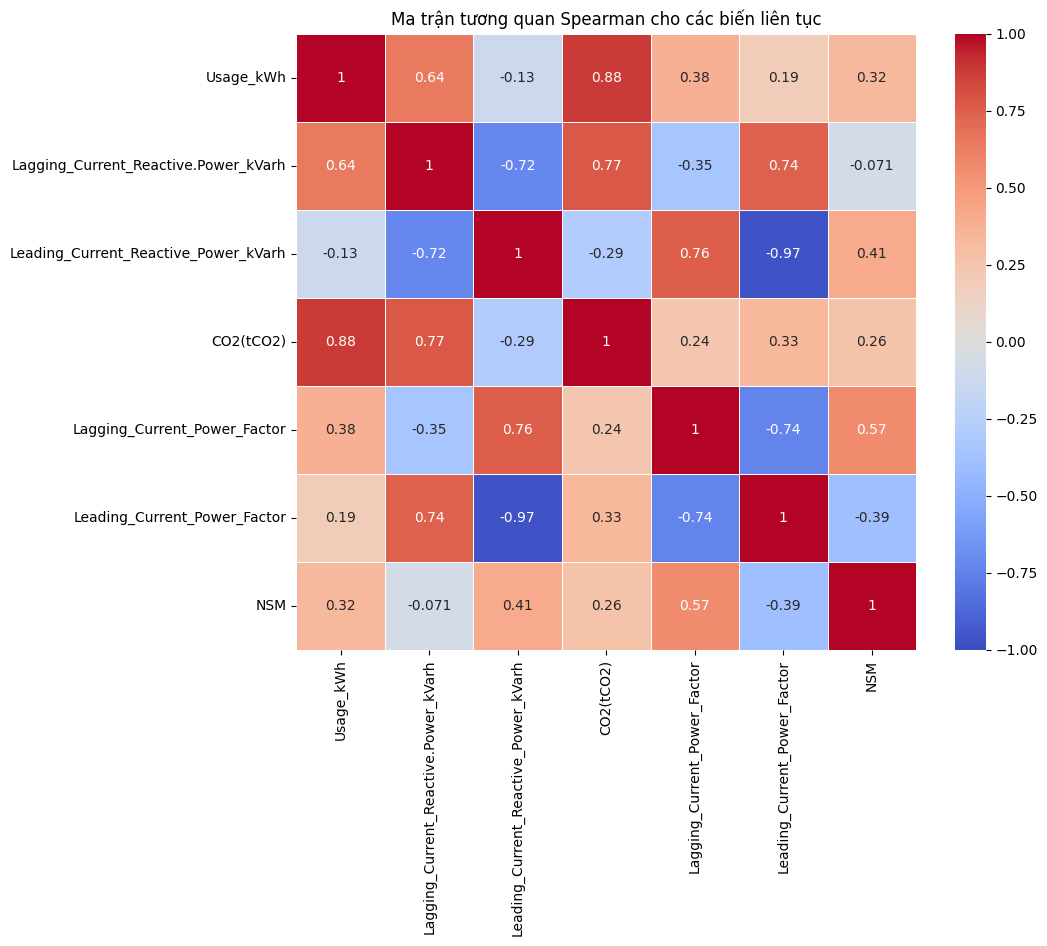

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, kendalltau, chi2_contingency

# Tạo ma trận tương quan Spearman cho các biến liên tục
continuous_vars = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                   'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# Tính toán tương quan Spearman cho các biến liên tục
corr_matrix = df[continuous_vars].corr(method = 'spearman')

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Ma trận tương quan Spearman cho các biến liên tục')
plt.show()

### 4. Chạy mô hình

LinearRegression:
  MSE = 19.8300
  MAE = 2.5607
  R2 = 0.9823
  Time = 0.1266 seconds

Ridge:
  MSE = 19.8283
  MAE = 2.5596
  R2 = 0.9823
  Time = 0.0182 seconds

Lasso:
  MSE = 22.2366
  MAE = 2.8042
  R2 = 0.9801
  Time = 2.3189 seconds


Biểu đồ cho mô hình: LinearRegression


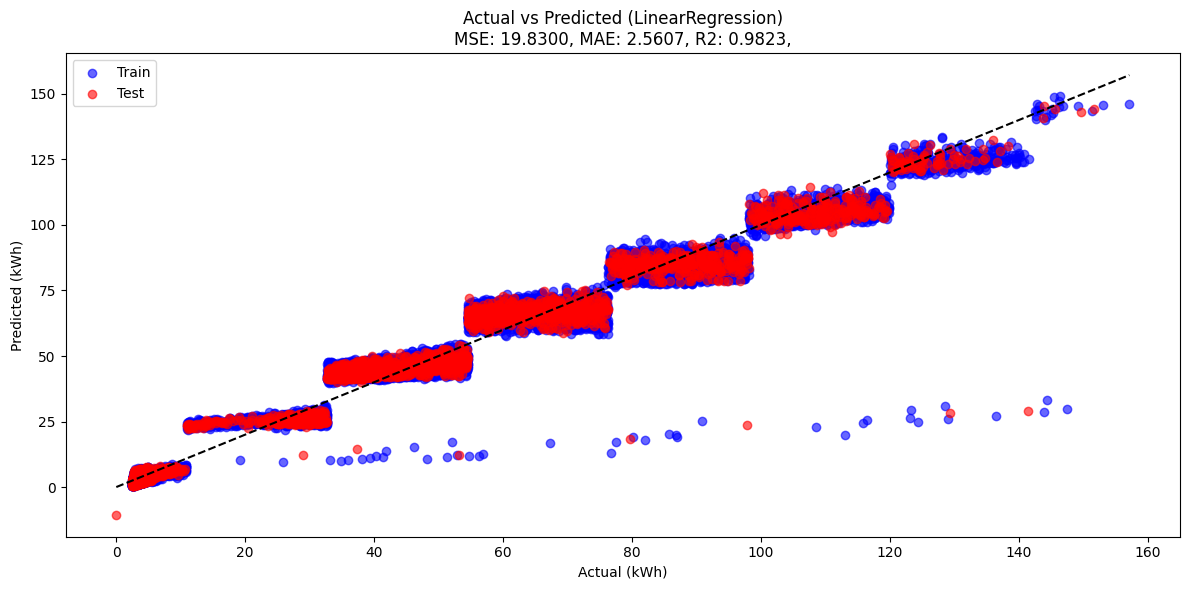

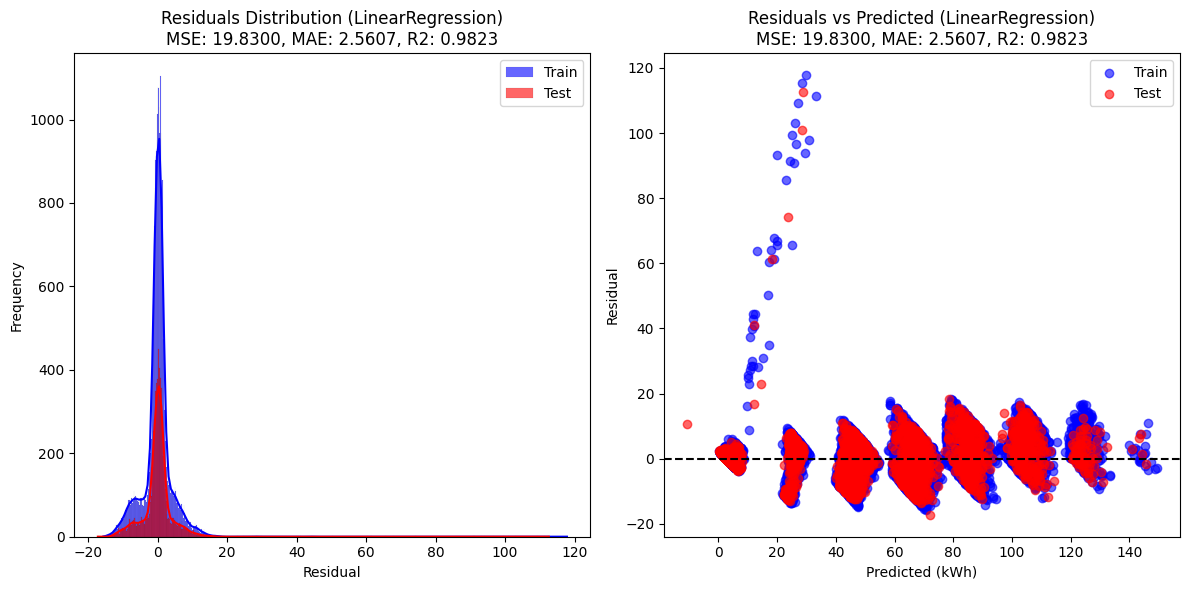


20 Dự đoán đầu tiên của mô hình LinearRegression:
    Actual   Predicted
0     3.64    4.087148
1     4.64    4.325429
2    90.61   87.264882
3     3.35    4.262929
4   141.44   28.839589
5     3.02    4.665273
6    50.15   47.653554
7    56.16   66.178945
8     4.39    6.440175
9     2.74    1.903554
10    5.98    5.493398
11    3.78    3.481679
12    3.67    5.250234
13    3.92    4.862538
14    3.96    3.797109
15    6.62    4.949941
16    5.26    5.036366
17  125.35  126.081288
18   50.90   43.280019
19    3.56    3.877187

Biểu đồ cho mô hình: Ridge


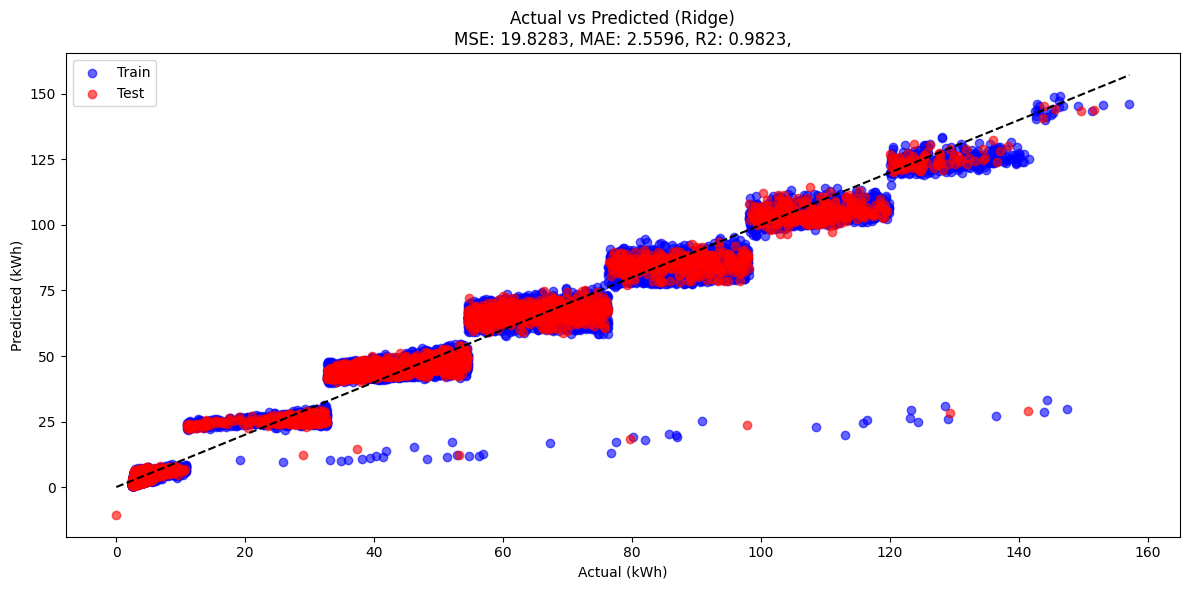

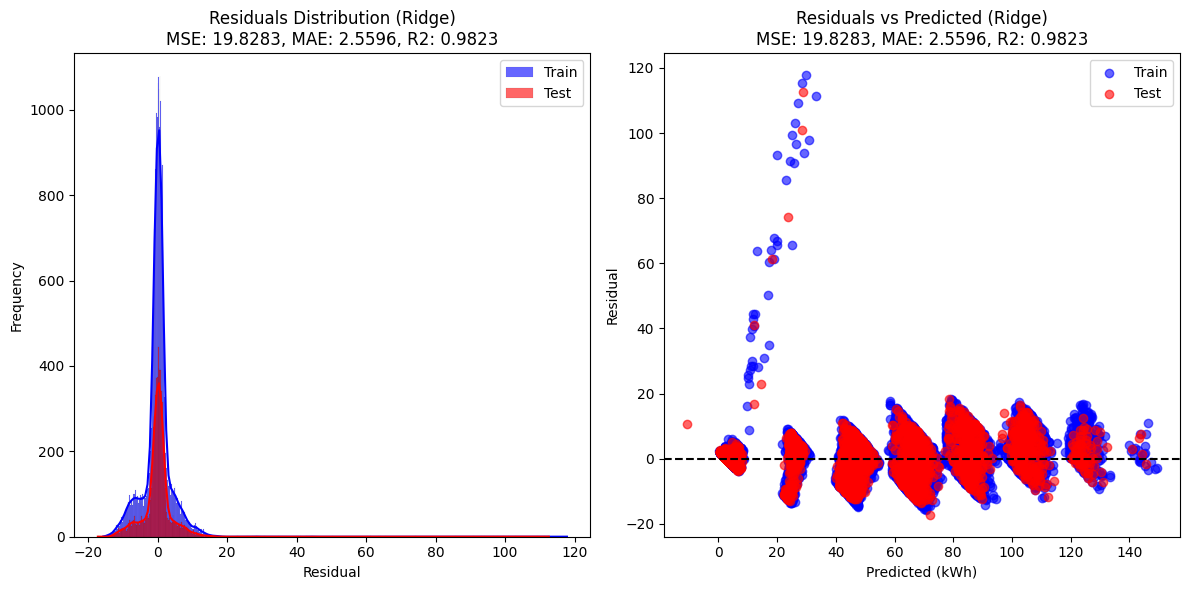


20 Dự đoán đầu tiên của mô hình Ridge:
    Actual   Predicted
0     3.64    4.086824
1     4.64    4.345259
2    90.61   87.261756
3     3.35    4.243573
4   141.44   28.838551
5     3.02    4.673559
6    50.15   47.657210
7    56.16   66.172883
8     4.39    6.427426
9     2.74    1.879649
10    5.98    5.493960
11    3.78    3.488197
12    3.67    5.231767
13    3.92    4.847666
14    3.96    3.788508
15    6.62    4.984267
16    5.26    5.050777
17  125.35  126.066427
18   50.90   43.278049
19    3.56    3.872228

Biểu đồ cho mô hình: Lasso


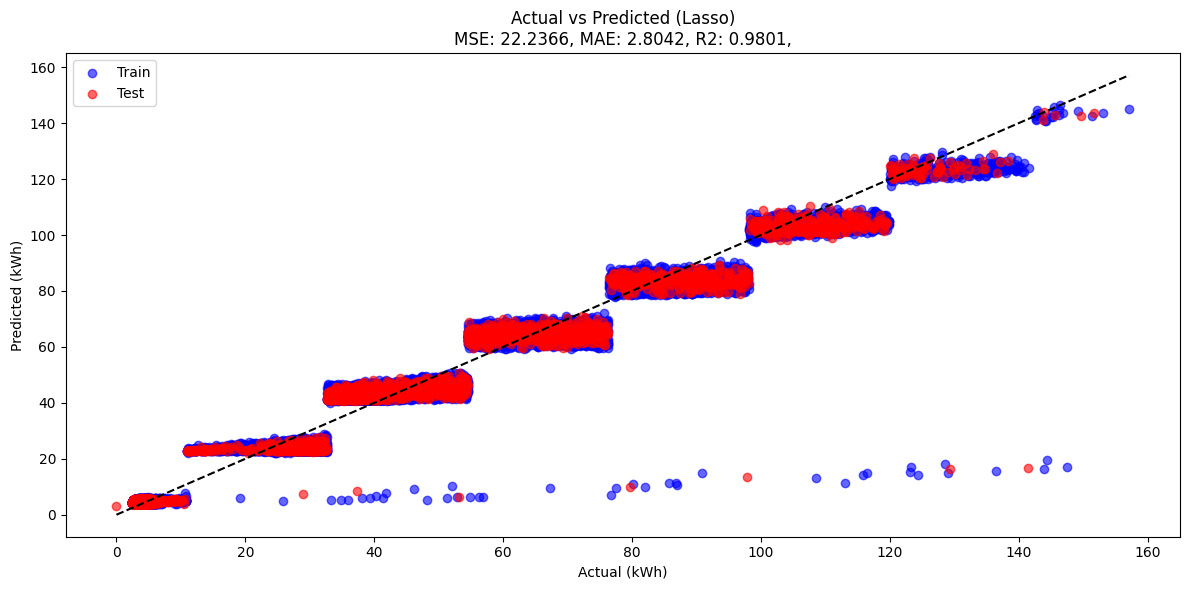

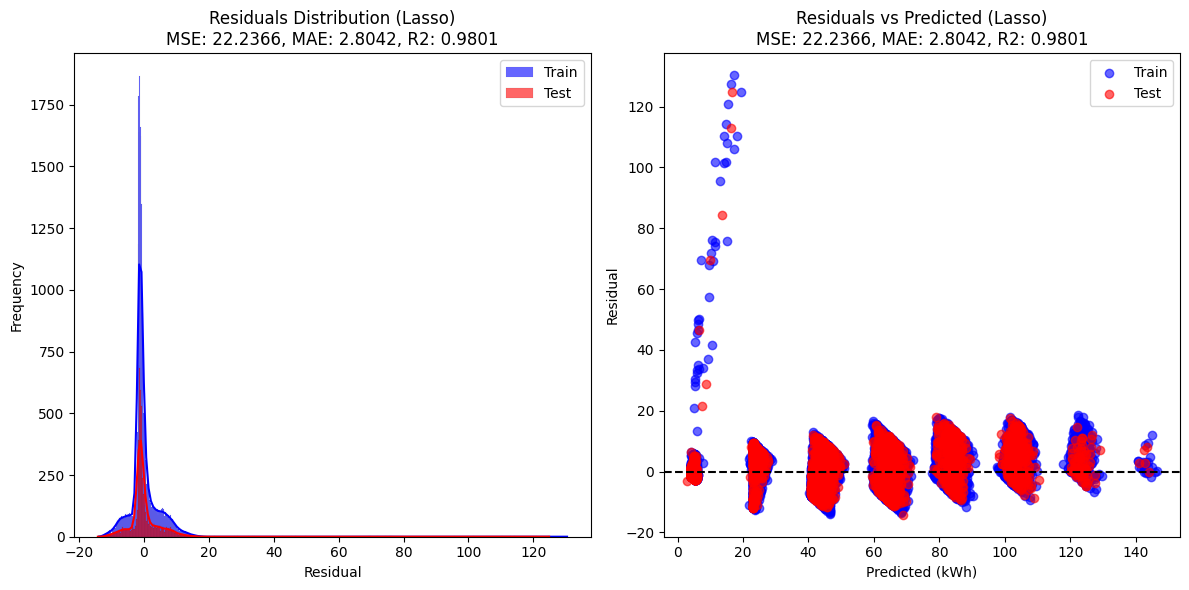


20 Dự đoán đầu tiên của mô hình Lasso:
    Actual   Predicted
0     3.64    4.428494
1     4.64    4.654284
2    90.61   85.294169
3     3.35    4.343554
4   141.44   16.590322
5     3.02    4.963221
6    50.15   45.398398
7    56.16   64.583951
8     4.39    4.426226
9     2.74    4.394987
10    5.98    4.726373
11    3.78    4.538537
12    3.67    5.527823
13    3.92    4.042466
14    3.96    4.002895
15    6.62    4.963221
16    5.26    4.963221
17  125.35  124.685341
18   50.90   41.778422
19    3.56    4.480952


In [5]:
## import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import time


def load_and_preprocess_data(file_path):

    # Đọc dữ liệu từ file CSV tại đường dẫn file_path
    data = pd.read_csv(file_path)

    # Chuyển đổi dữ liệu cột date từ string thành dạng datetime
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

    # Trích xuất các đặc tính thời gian của cột date vừa rồi ra thành các biến độc lập
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    data['minute'] = data['date'].dt.minute
    data['weekday'] = data['date'].dt.weekday

    # Xóa cột date khỏi data cũng như loại bỏ các giá trị bị trống (null)
    data = data.drop('date', axis=1).dropna()

    # Mã hóa các biến độc lập có dữ liệu text thành dữ liệu số
    data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'])

    return data


def split_and_scale_data(data):
    X = data.drop(['Usage_kWh'], axis=1)  # Biến độc lập
    y = data['Usage_kWh']  # Biến phụ thuộc (biến cần dự đoán)

    # Chia dữ liệu thành tập huấn luyện và kiểm thử
    # Tham số random_state nhằm cố định cách chia tập dữ liệu nhằm cho ra cùng một kết quả sau mỗi lần chạy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    # Chuẩn hóa các đặc trưng
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso()  
    }

    results = {}

    for name, model in models.items():
        # Bắt đầu đo thời gian 
        start_time = time.time()

        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Đo thời gian kết thúc
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Dự đoán
        y_pred = model.predict(X_test)

        # Tính toán các chỉ số đánh giá
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred) 
        r2 = r2_score(y_test, y_pred)
         

        # Lưu kết quả
        results[name] = {
            "MSE": mse,
            "MAE": mae,  
            "R2": r2,
            "Time": elapsed_time
        }

        print(f"{name}:")
        print(f"  MSE = {mse:.4f}")
        print(f"  MAE = {mae:.4f}")  
        print(f"  R2 = {r2:.4f}")
        print(f"  Time = {elapsed_time:.4f} seconds\n")

    return models, results



   # Biểu đồ Actual - Predict với phân biệt tập huấn luyện và tập kiểm thử
def plot_actual_vs_predicted(y_train, y_test, y_pred_train, y_pred_test, model_name, mse, mae, r2):
    plt.figure(figsize=(12, 6))

    # Vẽ các điểm dự đoán của tập huấn luyện (màu xanh dương)
    plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Train')

    # Vẽ các điểm dự đoán của tập kiểm thử (màu đỏ)
    plt.scatter(y_test, y_pred_test, alpha=0.6, color='red', label='Test')

    # Vẽ đường chéo
    plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))], 
             [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))], 
             color='black', linestyle='--')

    # Thêm tiêu đề và nhãn
    plt.title(f'Actual vs Predicted ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f},')
    plt.xlabel('Actual (kWh)')
    plt.ylabel('Predicted (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()



# Biểu đồ phân phối Residuals (Phân biệt tập huấn luyện và kiểm thử)
def plot_residuals(y_train, y_test, y_pred_train, y_pred_test, model_name, mse, mae, r2):
    residuals_train = y_train - y_pred_train
    residuals_test = y_test - y_pred_test

    plt.figure(figsize=(12, 6))

    # Biểu đồ phân phối residuals
    plt.subplot(1, 2, 1)
    sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.6)
    sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.6)
    plt.title(f'Residuals Distribution ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.legend()

    # Biểu đồ residuals - predict
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_train, residuals_train, alpha=0.6, color='blue', label='Train')
    plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(f'Residuals vs Predicted ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')
    plt.xlabel('Predicted (kWh)')
    plt.ylabel('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    data = load_and_preprocess_data("Steel_industry_data.csv")
    X_train, X_test, y_train, y_test, scaler = split_and_scale_data(data)
    models, results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    for model_name, model in models.items():
        y_pred_train = model.predict(X_train)  # Dự đoán của tập huấn luyện
        y_pred_test = model.predict(X_test)   # Dự đoán của tập kiểm thử
        
        mse = results[model_name]["MSE"]
        mae = results[model_name]["MAE"]  
        r2 = results[model_name]["R2"]

        print(f"\nBiểu đồ cho mô hình: {model_name}")
        plot_actual_vs_predicted(y_train, y_test, y_pred_train, y_pred_test, model_name, mse, mae, r2)
        plot_residuals(y_train, y_test, y_pred_train, y_pred_test, model_name, mse, mae, r2)

        # Hiển thị 20 dự đoán đầu tiên
        print(f"\n20 Dự đoán đầu tiên của mô hình {model_name}:")
        predictions_df = pd.DataFrame({'Actual': y_test.values[:20], 'Predicted': y_pred_test[:20]})
        print(predictions_df)

if __name__ == "__main__":
    main()